In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Télécharge le ﬁchier CIF du matériau mp-9437 et le convertit dans des structures pymatgen voulues

with MPRester("Dgm7hLo14n65cHTX") as m:

    bandstructure = m.get_bandstructure_by_material_id("mp-9437")

bspbs = BSPlotter(bandstructure)

# La structure de bandes électroniques du matériau mp-9437.

<module 'matplotlib.pyplot' from '/usr/local/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

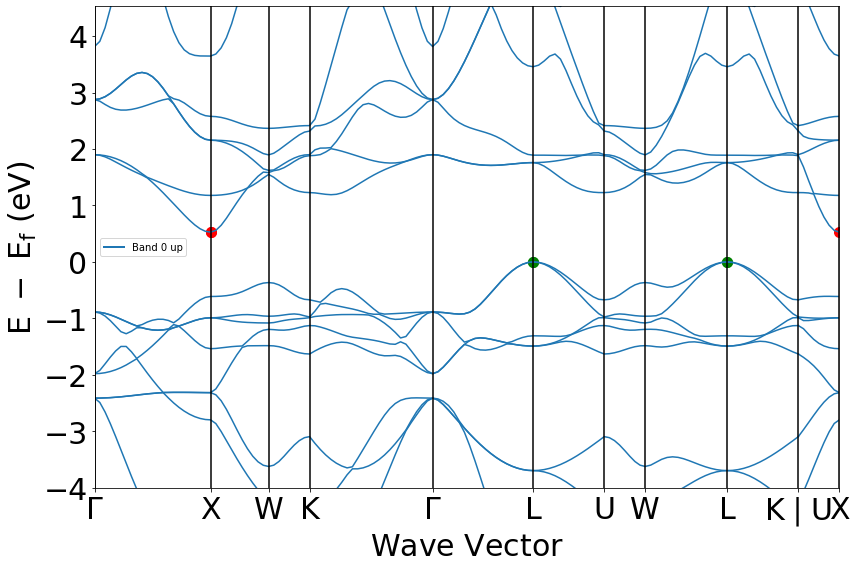

In [3]:
# Affichage de la structure de bandes électroniques

bspbs.get_plot(vbm_cbm_marker=True)#vbm_cbm_marker=True

# Détermination de la bande interdite.

In [4]:
# Détermination de la bande interdite

print("Bande interdite : ", bandstructure.get_band_gap()['energy'], "eV")

if bandstructure.get_band_gap()['direct']:
    print("La bande interdite est directe.")
else:
    print("La bande interdite est indirecte.")
    
print("Chemin de transition pour un apport d'énergie minimale : ", bandstructure.get_band_gap()['transition'])

Bande interdite :  0.5271999999999997 eV
La bande interdite est indirecte.
Chemin de transition pour un apport d'énergie minimale :  L-X


La bande interdite faisant moins de 1eV, le matériau mp-9437 est un semi-conducteur. La bande indirecte étant indirecte, pour qu'un électron ne recevant qu'un quanta d'énergie de 0.5271999999999997 eV devra obligatoirement avoir un changement de vecteur d'onde $k$ du point $L$ au point $X$ pour passer de la bande de valence à la bande de conduction.

# Direction dans laquelle la dernière (première) bande de valence (conduction) présente le plus et le moins de dispersion.

Une bande électronique est dite plus dispersée dans une direction plutôt que dans une autre quand la droite reliant les extrémités de la bande électronique selon cette direction est plus pentue dans cette direction que dans l'autre.

In [5]:
# Quelle est la dernière (première) bande de valence (conduction)?

print("La/les bande/s de valence contenant l'énergie la plus haute:")
print(bandstructure.get_vbm()['band_index'],'\n')
print("La/les bande/s de conduction contenant l'énergie la plus basse:")
print(bandstructure.get_cbm()['band_index'])

La/les bande/s de valence contenant l'énergie la plus haute:
defaultdict(<class 'list'>, {<Spin.up: 1>: [13, 14]}) 

La/les bande/s de conduction contenant l'énergie la plus basse:
defaultdict(<class 'list'>, {<Spin.up: 1>: [15]})


Pour le matériau mp-9437, les bandes de valence 13 et 14 sont celles qui contiennent l'énergie maximale. Pour la suite nous utiliserons donc la bande 14 qui est donc la dernière. En revanche, seule la bande de conduction 15 contient l'énergie minimale. Ce sera donc celle-ci qui sera utilisée.

In [6]:
# Détermination des chemins sur lesquels les structures sont le plus/moins dispersées

# Récupération des données
VecteurK = bspbs.bs_plot_data()['distances']
Energies = bspbs.bs_plot_data()['energy']

# Calcul des pentes
dispersVal = np.empty_like(VecteurK)
dispersCon = np.empty_like(VecteurK)

for i in range(len(VecteurK)):
    dispersVal[i] = abs((Energies['1'][i][14][0] - Energies['1'][i][14][-1])/(VecteurK[i][-1]-VecteurK[i][0]))
    dispersCon[i] = abs((Energies['1'][i][15][0] - Energies['1'][i][15][-1])/(VecteurK[i][-1]-VecteurK[i][0]))

# Détermination des chemins
maxVal = np.argmax(dispersVal)
minVal = np.argmin(dispersVal)
maxCon = np.argmax(dispersCon)
minCon = np.argmin(dispersCon)

<string>:6: VisibleDeprecationWarning:

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray



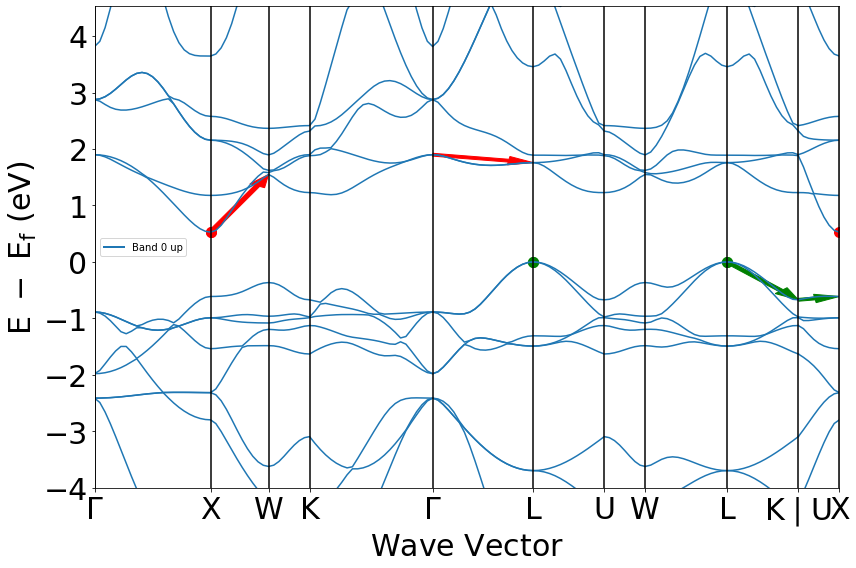

In [7]:
# Affichage du plot avec les flèches indiquant la dispersion les plus/moins grande

bspbs.get_plot(vbm_cbm_marker=True)
plt.arrow(VecteurK[minVal][0],Energies['1'][minVal][14][0],VecteurK[minVal][-1]-VecteurK[minVal][0],Energies['1'][minVal][14][-1]-Energies['1'][minVal][14][0],width = 0.05,length_includes_head=True,color='green') #Flèche pour la plus petite pente de la bande de valence
plt.arrow(VecteurK[maxVal][0],Energies['1'][maxVal][14][0],VecteurK[maxVal][-1]-VecteurK[maxVal][0],Energies['1'][maxVal][14][-1]-Energies['1'][maxVal][14][0],width = 0.05,length_includes_head=True,color='green') #Flèche pour la plus grande pente de la bande de valence
plt.arrow(VecteurK[minCon][0],Energies['1'][minCon][15][0],VecteurK[minCon][-1]-VecteurK[minCon][0],Energies['1'][minCon][15][-1]-Energies['1'][minCon][15][0],width = 0.05,length_includes_head=True,color='red')  #Flèche pour la plus petite pente de la bande de conduction
plt.arrow(VecteurK[maxCon][0],Energies['1'][maxCon][15][0],VecteurK[maxCon][-1]-VecteurK[maxCon][0],Energies['1'][maxCon][15][-1]-Energies['1'][maxCon][15][0],width = 0.05,length_includes_head=True,color='red')  #Flèche pour la plus grande pente de la bande de conduction
plt.show()

Pour la dernière bande de valence, la direction présentant le plus de dispersion est $L-K$ et celle présentant le moins est $U-X$.

Pour la première bande de conduction, la direction présentant le plus de dispersion est $X-W$ et celle présentant le moins est $\Gamma-L$.

# Calcul de la masse effective au sommet (base) de la dernière (première) bande de valence (conduction) en supposant une dispersion parabolique.

La masse effective d'un électron, en unités atomiques, est obtenue comme : $$ m_{\text{eff, u.a.}} = \left(\frac{\partial^2E}{\partial k^2}\right)^{-1} $$ Comme on suppose que $E$ peut être approximé par une parabole : $$ E(k) = a\,k^2+ b\, k + c $$

La dérivée seconde de l'énergie est donc $2a$ où $a$ est le coefficient quadratique de la parabole.

In [8]:
# Détermination du sommet de la dernière bande de valence 
# et de la base de la première bande de conduction

valMaxs = bspbs.bs_plot_data()['vbm']
conMins = bspbs.bs_plot_data()['cbm']

print("Les sommets de la dernière bande de valence :\n", valMaxs,"\n")
print("Les bases de la première bande de conduction :\n", conMins)

Les sommets de la dernière bande de valence :
 [(3.9792216055556726, 0.0), (3.9792216055556726, 0.0), (5.740318604466572, 0.0), (5.740318604466572, 0.0)] 

Les bases de la première bande de conduction :
 [(1.0526375822215186, 0.5271999999999997), (1.0526375822215186, 0.5271999999999997), (6.757088430856821, 0.5271999999999997)]


Le fait que certains points soient en double est du au fait que ce point est à l'extrémité de deux directions.

Ensuite, les différents points sont du au fait que le parcours du vecteur $k$ passe plusieurs fois par $L$, lieu du sommet de la dernière bande de valence, et par $X$, lieu de la base de la première bande de conduction. Tous ces points sont donc identiques et nous allons donc choisir les premiers pour la suite.  

In [9]:
valMax = valMaxs[0]
valMin = conMins[0]

# Récupération de la zone du maximum

locValMax = None
locConMin = None
distances = bspbs.bs_plot_data()['distances']

for i in range(len(distances)):
    if locValMax == None and distances[i][-1] == 3.9792216055556726:  # Car on prend le premier maximum
        locValMax = i
    if locConMin == None and distances[i][-1] == 1.0526375822215186:  # Car on prend le premier minimum
        locConMin = i

Comme il faut interpoler une parabole, il faut 3 points. Je choisis donc de prendre le point du maximum et ses 2 voisins.

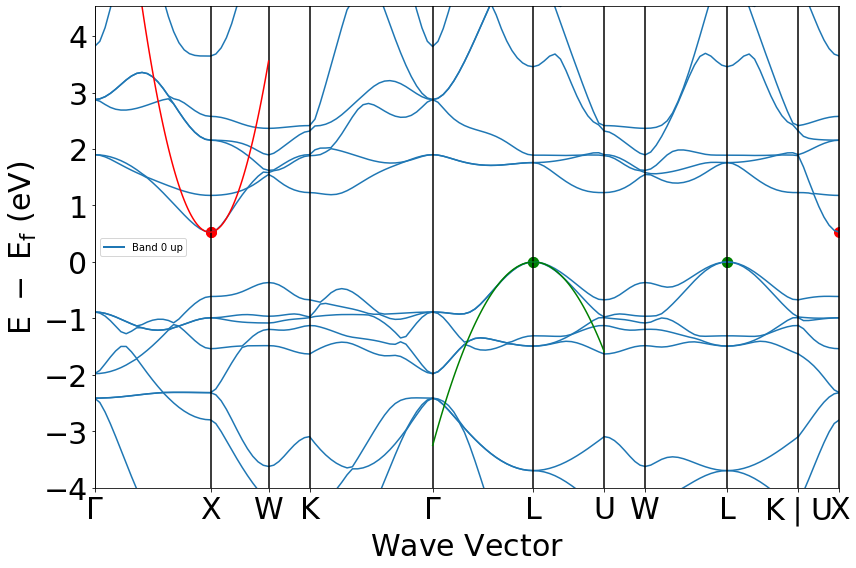

In [10]:
# Récupération des distances où l'interpolation aura lieu

disToFitVal = [distances[locValMax][-2], distances[locValMax][-1], distances[locValMax+1][1]]
disToFitCon = [distances[locConMin][-2], distances[locConMin][-1], distances[locConMin+1][1]]

# Récupération des énergies où l'interpolation aura lieu

EnerToFitVal = [Energies['1'][locValMax][14][-2],Energies['1'][locValMax][14][-1],Energies['1'][locValMax+1][14][1]]
EnerToFitCon = [Energies['1'][locConMin][15][-2],Energies['1'][locConMin][15][-1],Energies['1'][locConMin+1][15][1]]

# Interpolation

CoefParaVal = np.polyfit(disToFitVal, EnerToFitVal, 2)
CoefParaCon = np.polyfit(disToFitCon, EnerToFitCon, 2)

def parabole(coef, k):
    return coef[0]*k**2 + coef[1]*k + coef[2]

# Affichage des interpolations obtenues

kVal = np.linspace(distances[locValMax][0], distances[locValMax+1][-1], 100)
kCon = np.linspace(distances[locConMin][0], distances[locConMin+1][-1], 100)

bspbs.get_plot(vbm_cbm_marker=True)
plt.plot(kVal, parabole(CoefParaVal, kVal), color='green')
plt.plot(kCon, parabole(CoefParaCon, kCon), color='red')
plt.show()

On peut maintenant calculer les masses effectives.

In [11]:
print("La masse effective des électrons au sommet de la dernière bande de valence :")
print("\t", 2*CoefParaVal[0], "u.a.")
print("La masse effective des électrons à la base de la première bande de conduction :")
print("\t", 2*CoefParaCon[0], "u.a.")

La masse effective des électrons au sommet de la dernière bande de valence :
	 -7.752103084320032 u.a.
La masse effective des électrons à la base de la première bande de conduction :
	 21.22872895469405 u.a.


L'unité atomique de masse étant la masse de l'électron et valant $9,109 382 6 \, 10^{−31}$ kg, en unité SI, on obtient une masse effective respectivement de -7.061 687 295 × 10−30 kg et 1.933 806 142 × 10−29 kg.

L'unité atomique nous permet ainsi de voir que la masse effective de l'électron peut être supérieure d'un ordre de grandeur de sa masse réelle.

On remarque que la masse effective de l'électron au sommet de la bande de valence est négative alors que celle de l'électron à la base de la bande de conduction est positive. Cela est parfaitement logique au vu des concavités des 2 paraboles. 